# Building the neurons from scratch! 🧠
Yes, this is the challenge but it will be simplified here because I am following Karpathy's NN Zero-to-hero course! And my main motivation is:

> To think clearly, understand the basics. If you 're memorizing advanced concepts without being able to re-derive them as needed, you are lost. <br> <br> — Naval

### But, it's already there, why to build here? 🔖
Yes, the "Spelled out walkthrough" is already [there](https://youtu.be/VMj-3S1tku0) but here I would love to "implement" step-by-step so anyone who has already been there from his playlist but want to refer some specific sections, then he/she can directly come to the notebook and understand the code.

I will follow my same old approach to explain the things in simple language. Without BS.

Let's code directly!

### 

# What to expect?
- Explanations with experiments 
- Simplified math
- Working and fully functioning code

At the end of this single notebook you will know "what neural network does" behind the scenes.

### Hats off to...
Karpathy's [Micrograd](https://github.com/karpathy/micrograd)! A completely trainable neural network within just 2 python files consisting less than ~150 lines of code.

We will building up that from here.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Why do we use the neural nets?
...or any ML algorithm?

The simple answer is: **to understand the relationship between the input X and the output Y** to **model the unknown function `f`**.

So, the unknown function `f` is the relationship. It can be simple as: `y = x + 2b` or it can be much more complex, which doesn't require any example 😊

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

The above is the function (true function) which binds the `x` with its output `y`.

In [3]:
f(3)

20

So, if we see its shape...

In [4]:
x = np.arange(-10, 11)
y = list(map(f, x))

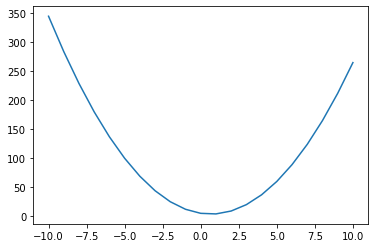

In [5]:
plt.plot(x, y);

So, now we would like to see: ***"What is the derivative of this function at any given point X?"***

> Which means, if we slightly change the value of our input X (say just 0.0001, plus or minus) then how does the function respond? Does its value go up or down and by how much?

In [6]:
h = 0.001 # change by `h` - a (very) small number
x = 3
old = f(x)
new = f(x + h)

print("Old:", old)
print("New:", new)

Old: 20
New: 20.014003000000002


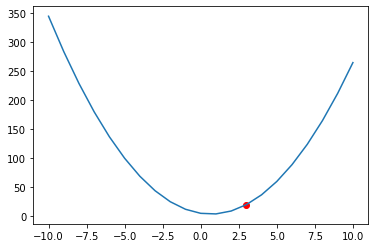

In [7]:
X = np.arange(-10, 11)
Y = list(map(f, X))

plt.plot(X, Y)
plt.scatter(x, f(x), color="r");

In [8]:
# This is the "change"
new - old

0.01400300000000243

In [9]:
# This is the "slope" (normalized by the "h")
(new - old) / h

14.00300000000243

Say, now we are taking `-3` instead of `3` like above, then slop would be?

In [10]:
h = 0.001
x = -3
old = f(x)
new = f(x + h)

print("Old:", old)
print("New:", new)

Old: 44
New: 43.978003


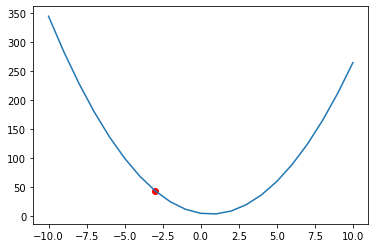

In [11]:
X = np.arange(-10, 11)
Y = list(map(f, X))

plt.plot(X, Y)
plt.scatter(x, f(x), color="r");

In [12]:
# This is the "change"
new - old

-0.021996999999998934

In [13]:
# This is the "slope" (normalized by the "h")
(new - old) / h

-21.996999999998934

So at this particular point...

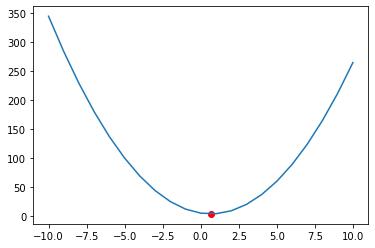

In [14]:
x = np.arange(-10, 11)
y = list(map(f, x))

plt.plot(x, y)
plt.scatter(2/3, f(2/3), color="r");

In [15]:
h = 0.001
x = 2/3
old = f(x)
new = f(x + h)

print("Old:", old)
print("New:", new)

Old: 3.666666666666667
New: 3.6666696666666665


In [16]:
# This is the "change"
new - old

2.9999999995311555e-06

In [17]:
# This is the "slope" (normalized by the "h")
(new - old) / h

0.0029999999995311555

Here the slope is `0.0`.

### Multiple Inputs

Till now we only had single input `x` where we saw how the function responds where a tiny change happens for a perticular value of `x`.

But in reality, there are so many inputs in the function `f` where we need to find the slope of a function when one of the input changes — so we need to ***isolate*** the effect of the inputs.

In [18]:
def f(a, b, c):
    return a*b + c

In [19]:
a = 2.0
b = -3.0
c = 10.0

f(a, b, c)

4.0

Now let's start changing the value of `a` by `h`.

In [20]:
h = 0.0001

old = f(a, b, c)
a += h
new = f(a, b, c)

# slope
(new - old) / h

-3.000000000010772

This means, when `b` and `c` are -3 and 10 respectively, and if `a` is 2, then if you change `a` by tiny amount then, the slope will be `-3.0`.

####  A calculus here?
Differenciating `a`, `b`, and `c` with respect to `a` gives the value of `b`. Which is -3!

In [21]:
h = 0.0001

old = f(a, b, c)
b += h # Changing `b` value
new = f(a, b, c)

# slope
(new - old) / h

2.0001000000124947

It has a slope of `a`!

In [22]:
h = 0.0001

old = f(a, b, c)
c += h # slight change in `c`
new = f(a, b, c)

# slope
(new - old) / h

0.9999999999976694

It has slope of `1`.

#### 🤔 What is going on?
- See, `a` and `b` are closely related - so any change in either variable will lead to the change in the function of the other variable
- But `c` is independent, any change in `c` will directly lead to that many change in the function without any multiplier. So, if we increase `c` by 1 then only 1 will be added to the function.
- But if we change `a` by 1 then the change will be `1 * b` so, the change is `b` times! That's why we get such slopes.

#### For other inputs? 

In [23]:
def f(a, b, c, d):
    return a*b*d + c

In [24]:
a = 2.0
b = -3.0
c = 10.0
d = 5.0

f(a, b, c, d)

-20.0

In [25]:
h = 0.0001

old = f(a, b, c, d)
a += h # slight change in `a`
new = f(a, b, c, d)

# slope
(new - old) / h

-15.000000000071623

In [26]:
b * d

-15.0

In case of ***division***?

In [27]:
def f(a, b, c, d):
    return (a*b)/d + c

In [28]:
f(a, b, c, d)

8.79994

In [29]:
h = 0.0001

old = f(a, b, c, d)
a += h # slight change in `a`
new = f(a, b, c, d)

# slope
(new - old) / h

-0.5999999999950489

In [30]:
b / d

-0.6

Crazy!

👉 **Summary**:
- `*` and `/` are closely related operations: Variable slope (x)
- `+` and `-` are independently related operations: Constant slope (1)

## The basics are done 🎉
Not quite, but we got some intuition on the slopes. So, the neural networks are just the collection of these expressions. We calculate the derivatives (slopes) for each values for the unknown function `f` and we keep refining until we make the loss so tiny.

But to hold all of these expressions, we need some kind of datastructure. 

In [31]:
class Value:
    """
    This is the Value class which stores a python float
    and is able to perform addition, multiplication, divisions 
    and subtractions.
    
    But that is not it, it is the base for the neural net
    and will be also able to hold other operations such as
    backprop, forwardpass, activation functions etc.
    
    But this is just the first iteration so we will define
    the skeleton only.
    """
    
    def __init__(self, data):
        self.data = data
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [32]:
Value(1.2)

Value(data=1.2)

In [33]:
class Value:
    """
    Adding ADDITION, SUBTRACTION, DIVISION, MULTIPLICATION
    """
    
    def __init__(self, data):
        self.data = data
        
    def __add__(self, other):
        return Value(self.data + other.data)
    
    def __truediv__(self, other):
        return Value(self.data / other.data)
    
    def __mul__(self, other):
        return Value(self.data * other.data)
    
    def __sub__(self, other):
        return Value(self.data - other.data)
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [34]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

a + b

Value(data=-1.0)

In [35]:
a - b

Value(data=5.0)

In [36]:
a * b

Value(data=-6.0)

In [37]:
a / b

Value(data=-0.6666666666666666)

In [38]:
a*b + c

Value(data=4.0)

Since, we will be building the neural net, we will also need the pointers which can keep track of the values from which it has produced the result.

For the example `a*b + c` we need to keep track how did we end up as the result `4`?
- a * b = -6
- (-6) + c = 4

So, these steps we took to reach at the answer 4. So, we will keep the track of the pointers.

In [39]:
class Value:
    """
    Adding the children.
    First, when the Value will be initialized, there won't be any
    children.
    
    But after that, when we do the operation, the children will be
    populated and also then the _prev.
    """
    
    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)
        
    def __add__(self, other):
        return Value(self.data + other.data, (self, other))
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other))
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other))
    
    def __sub__(self, other):
        return Value(self.data - other.data, (self, other))
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [40]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

d = a*b + c
d

Value(data=4.0)

In [41]:
# Yes for now, we will need to accees the `_prev` to see children
# we are not adding that in the __repr__ because we won't use it often
d._prev

{Value(data=-6.0), Value(data=10.0)}

Okay, but we don't know ***what operation*** used for `d`, so we will add that too.

In [42]:
class Value:
    """
    Added the operation symbol and a label symbol
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other), '/')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [43]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")

d = a*b + c
d._label = "d"
d._prev, d._operation, d._label

({Value(data=-6.0), Value(data=10.0)}, '+', 'd')

# Visualizing the expression 

Now, we will need something to "visualize" so that we could see overall expression!

> 💡 ***NOTE:*** The following code is more on "how to generate a visualization by using the graphviz library" rather than related with neural net. So, please don't try to understand the code, just run it. And take my word for it, you won't need to understand this code for a neural net understanding.

In [44]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f}" % (n._label, n.data), shape='record')
    if n._operation:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._operation, label = n._operation)
      # and connect this node to it
      dot.edge(uid + n._operation, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._operation)

  return dot

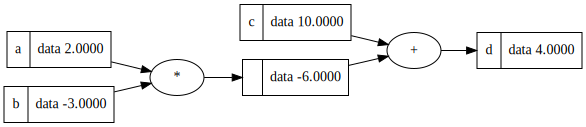

In [45]:
draw_dot(d)

Cool! <br>
Let's simulate the loss value at the end

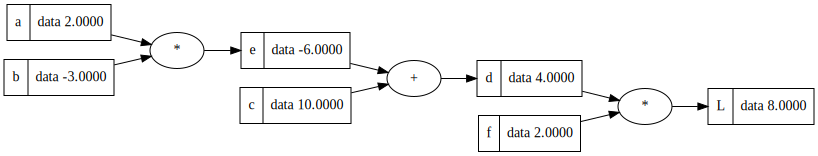

In [46]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")

e = a*b
e._label = "e"

d = e + c
d._label = "d"

f = Value(2.0, label="f")
L = f * d
L._label = "L"
draw_dot(L)

### What did we do here?
This **was** the forward pass or call the "forward propogation". 

It is the process of deriving at the result by doing the calculation of weights with the data (of course including the bias) and then finding the loss of that result. Then it comes the back propogation.

### What is back propogation then?
It is the process of ***finding the gradient / slope / derivation*** for all intermediate values holding others constant, for the loss value. So, here in this case, we will be calculating the gradients for `a`, `b`, `c`, `d`, `e`, and `f` for the value `L`.

In [47]:
class Value:
    """
    Adding the variable which keeps track of derivative / slope / gradient
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
        # because we assume that the value doesn't affect the 
        # loss function by default, thus the slope is 0.0
        self.grad = 0.0 
        
        
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other), '/')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [48]:
from graphviz import Digraph

""" JUST ADDING THE .grad TO THE VISUALIZATION"""
def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n._label, n.data, n.grad), shape='record')
    if n._operation:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._operation, label = n._operation)
      # and connect this node to it
      dot.edge(uid + n._operation, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._operation)

  return dot

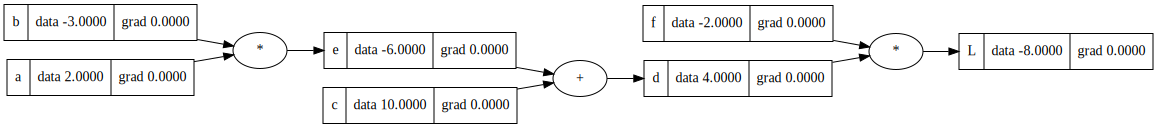

In [49]:
a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10.0, label="c")

e = a*b
e._label = "e"

d = e + c
d._label = "d"

f = Value(-2.0, label="f")
L = f * d
L._label = "L"
draw_dot(L)

### Let's start BackProp

We will start by the right most Value, which is `L`. <br>
So the question:

> What is the gradient of `L` with respect to `L`?

Of course, it is `1`. Because the more you rise or drop L by unit 1, there will be gradient 1 only. It is not in relation with other variables which impacts the `L` so, 1 will be the answer.

Or, if I change `L` by some tiny value `h`, then how much will be the change in `L`? Of course, it is `h`. So, it is propotional and it will be `1`.

In [50]:
def cross_check():
    h = 0.0001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c") 
    
    # Old operation
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    old = L.data
    
    # New operation by changing one of the Values' value
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    new = L.data + h
    
    return (new - old) / h

In [51]:
cross_check()

0.9999999999976694

See? Now a change in `L` has a `1` slope.

## So, we will start by manually setting `grad` for L

### 1️⃣ Backprop Step - 1

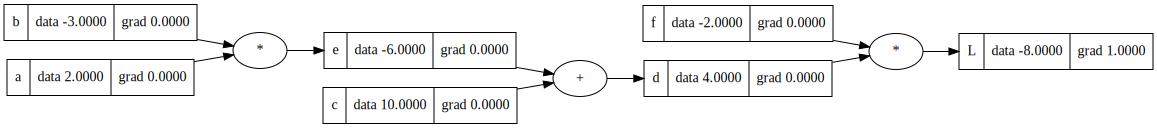

In [52]:
L.grad = 1.0
draw_dot(L)

### 2️⃣ Backprop step - 2
Get the `grad` for L with respect to the change in the value `d` (one of two values from the last operation).

So:

- $L = d \times f$

Since, the sign is `*` or the **multiplication**, we know from our basics that, the slope is always **the same** as of the **other variable** for that operation.

#### Simple Rules of 👍
- If there is the sign `*` or `/` take the gradient the same as the other variable for that operation
- If there is the sign `+` or `-` take the gradient `1.0`

Please refer to the sections above to get the idea of what is going on. This is exactly the same here.

#### Mathematically...

We will get the derivation:
- Derivation of `L` / Derivation of `d` = ?

Which in sentence:
> What is the derivation of loss "L" with respect to the derivation of "D"?

In Maths:
1.  $\text{slope} = (\text{new} - \text{old}) / h$
2. $= (f(d + h) - fd)) / h$
3. $=(fd + fh - fd) / h$
4. $=fh / h$
5. $= f$

> Don't confuse `f` here with the function `f()`. This is just the poor - redundent names. Here I have used the variable `f`.

Thus, we will get the answer:
- Derivation of `L` / Derivation of `d` = `f`

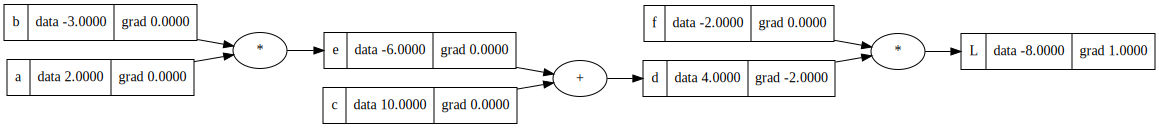

In [53]:
# Since we are doing it manually, we need to keep it for now.
d.grad = f.data
draw_dot(L)

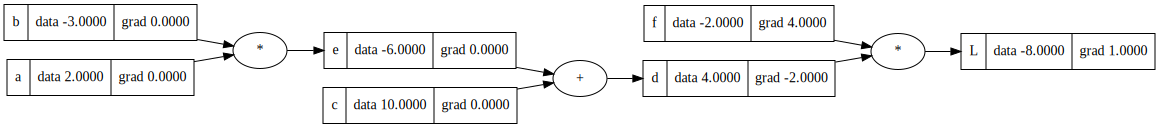

In [54]:
# And the same for `f`
f.grad = d.data
draw_dot(L)

Check!

In [55]:
def cross_check():
    h = 0.0001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c") 
    
    # Old operation
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    old = L.data
    
    # New operation by changing one of the Values' value
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    d.data += h ### CHANGE IN `d`
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    new = L.data
    
    return (new - old) / h

cross_check()

-1.9999999999953388

See! That's same as `f`.

### 3️⃣ Backprop Step - 3 

Okay, now we have to look for the `c` and `e`. **But wait** here we have the operation `+`. So, simply we would add `1.0` as the grad!!!

### But wait (again!)
Here, we are at the second last layer, so __`c` and `e` DON'T HAVE direct impact on `L`__. But they impact the `L` ___via___ `d` and `f`. So, here's the CHAIN RULE!

This would sound like a lot, but it is just the multiplication which we will see.  Since, the addition and subtraction always pass the values from the last layer, we would assign `1` there - but not directly!

In [56]:
# Cross check it
def cross_check():
    h = 0.0001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c") 
    
    # Old operation
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    old = L.data
    
    # New operation by changing one of the Values' value
    e = a*b; e._label="e"
    c.data += h ### CHANGE IN `d`
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    new = L.data
    
    return (new - old) / h

cross_check()

-1.9999999999953388

See, here we are getting the value `-2` which is the value of `d`'s grad.

<img src="./Images/BackProp.jpg">

A small explanation on why **just not the `1`** but `-2`?
- There will be `1.0` grad for `c` and `e` because there we have the the `+` operation
- The **don't have** a direct impact on `L` thus, we will apply the chain rule, which is just multiplying the grad of previous operation (here `d`)
- So, `1.0` * `-2.0` gives us `-2.0`.

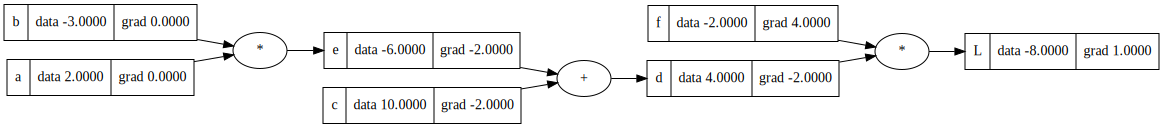

In [57]:
# For `e` and `c`
e.grad = 1.0 * d.grad
c.grad = 1.0 * d.grad
draw_dot(L)

#### A proof?

We will get the derivation:
- Derivation of `d` / Derivation of `e` = ?

In Maths (for e):
1.  $\text{slope} = (\text{new} - \text{old}) / h$
2. $= (c + (e + h) - c+e)) / h$
3. $=h/ h$
4. $=1$

So...
- Derivation of `d` / Derivation of `e` = 1

### 4️⃣ Backprop Step - 4

Okay, now we are at the stage where we need to find the grads for the `a` and `b`. But they have the `*` symbol and ***also*** we will have to apply the chain rule.

So, from our intuition, 
> If `a` and `b` are related by `*` operation, then `a` will get the grad of `b`'s data and vice versa.

And also the chain rule will apply, the "local" grads of `a` and `b` will be multiplied by the grad of `e` to apply the chain rule.

In [58]:
a.grad = b.data * e.grad
b.grad = a.data * e.grad

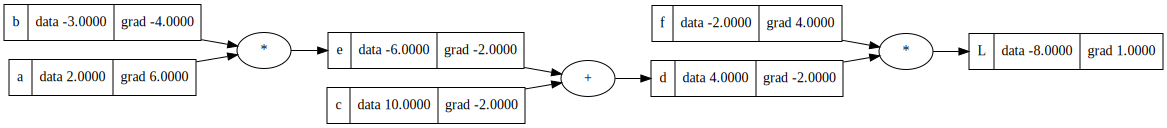

In [59]:
draw_dot(L)

In [60]:
# Cross check it
def cross_check():
    h = 0.0001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c") 
    
    # Old operation
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    old = L.data
    
    # New operation by changing one of the Values' value
    a.data += h ### CHANGE IN `a`
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    new = L.data
    
    return (new - old) / h

cross_check()

6.000000000021544

In [61]:
# Cross check it
def cross_check():
    h = 0.0001
    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10.0, label="c") 
    
    # Old operation
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    old = L.data
    
    # New operation by changing one of the Values' value
    b.data += h ### CHANGE IN `b`
    e = a*b; e._label="e"
    d = e+c; d._label="d"
    f = Value(-2.0, label="f")
    L = f * d; L._label="L"
    new = L.data
    
    return (new - old) / h

cross_check()

-4.000000000008441

Woof! Done!

# 🦋 Have a look man! 
We have done our first phase of the backprop!!! Manually!!!

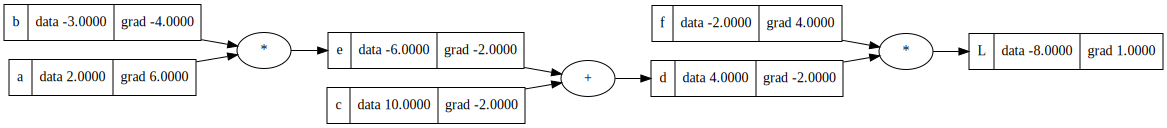

In [62]:
draw_dot(L)

But of course, we will refine the weights - and then iterate over these multiple times to get the optimal grads!

# First Optimization Step 
Here we will change the values of the weights (here data) so that the loss can be reduced.

In [63]:
learning_rate = 0.01

a.data += learning_rate * a.grad
b.data += learning_rate * b.grad
c.data += learning_rate * c.grad

e = a*b; e._label="e"
d = e+c; d._label="d"
L = f * d; L._label="L"

In [64]:
L.data

-7.4352

See? Here we have controlled the a, b, and c with the given learning rate and based upon which the `L` has changed. It actually has **increased** and coming closer to the 0.

# 🙄 One more? 
Just a simple example towards the neural nets so that we can be more familiar with the terminoligies of the neural net (bias, weights!).

In [65]:
# We will just have 2 inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

Of course, when we create a neural net, we have multiple layers inside and even if not (in case of perceptron) we have a single layer but has **the initial random weights** populated by some randomization techniques.

In [66]:
# Weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

The **bias**, no matter what the calculation is of the weight and the data, we will "drive" the calculation with `bias`.

In [67]:
# bias
b = Value(6.7, label="b")

> The Equation formation ***is*** the neural network formation

In [68]:
x1w1 = x1*w1
x1w1._label="x1w1"

x2w2 = x2*w2;
x2w2._label="x2w2"

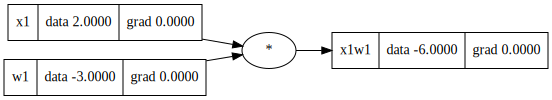

In [69]:
draw_dot(x1w1)

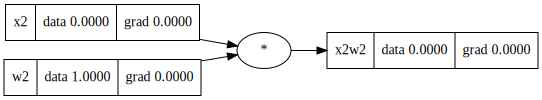

In [70]:
draw_dot(x2w2)

Okay! Now we will take this to another level.

In [71]:
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2._label = "x1w1x2w2"

# Finally the bias
n = x1w1x2w2 + b
n._label = "n"

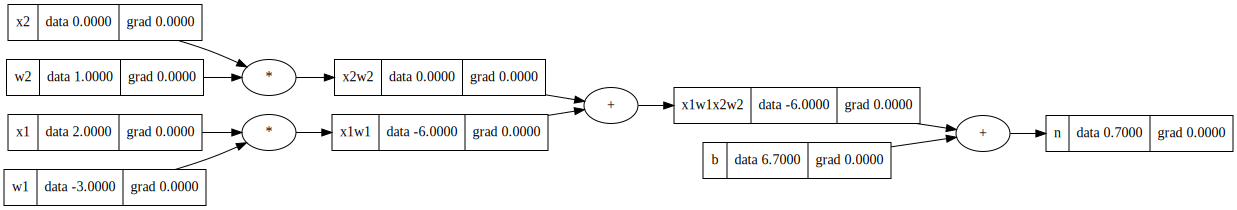

In [72]:
draw_dot(n)

In case if you are wondering what we have done...

Initial variables: X1, X2, W1, W2 <br>
Then... $((X1*W1) + (X2 * W2)) + b$

🔌 That's it! 

## Hold on!
We still require the **activation** function. Which is essential to "take the values into some range". 

Since we are building everything from scratch, we will also need ***our own*** activation function somehow inside embedded to the `Value` object. So that is it specially highly compitible with our `Value`!

In [73]:
class Value:
    """
    Adding the activation functions. Tanh and ReLu.
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
        # because we assume that the value doesn't affect the 
        # loss function by default, thus the slope is 0.0
        self.grad = 0.0 
        
    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        return out
    
    def relu(self):
        x = self.data
        out = Value(0 if x < 0 else x, (self,), 'ReLU')
        return out

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __truediv__(self, other):
        return Value(self.data / other.data, (self, other), '/')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    
    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [74]:
x1w1 = x1*w1
x1w1._label="x1w1"

x2w2 = x2*w2;
x2w2._label="x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2._label = "x1w1x2w2"

# Finally the bias
n = x1w1x2w2 + b
n._label = "n"

In [75]:
# calling tanh
o = n.tanh()

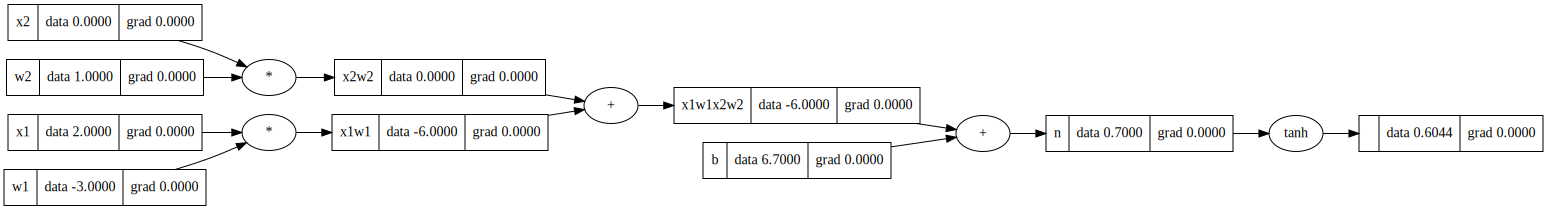

In [76]:
draw_dot(o)

In [77]:
# calling relu
o = n.relu()

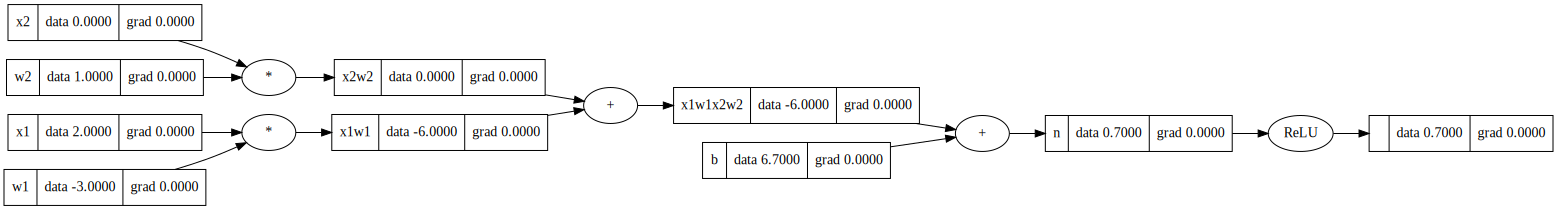

In [78]:
draw_dot(o)

### Alright!

Now, continuing with the example.

In [79]:
x1w1 = x1*w1
x1w1._label="x1w1"

x2w2 = x2*w2;
x2w2._label="x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2._label = "x1w1x2w2"

# bias - a special value from the video
b = Value(6.88137, label="b")

# Finally the bias
n = x1w1x2w2 + b
n._label = "n"

# calling tanh
o = n.tanh()
o._label = "o"

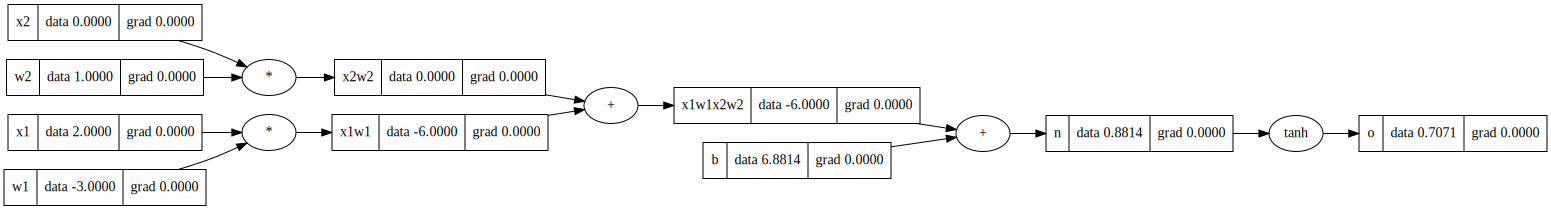

In [80]:
draw_dot(o)

So, the situation:
- We have built just a single neuron.
- That has 2 inputs, 2 weights and an applied activation.
- We will now simulate the backprop for this.
- We will assume that the last `o` is the loss `L` and we will backprop from there.

### 1️⃣ Backprop Step - 1

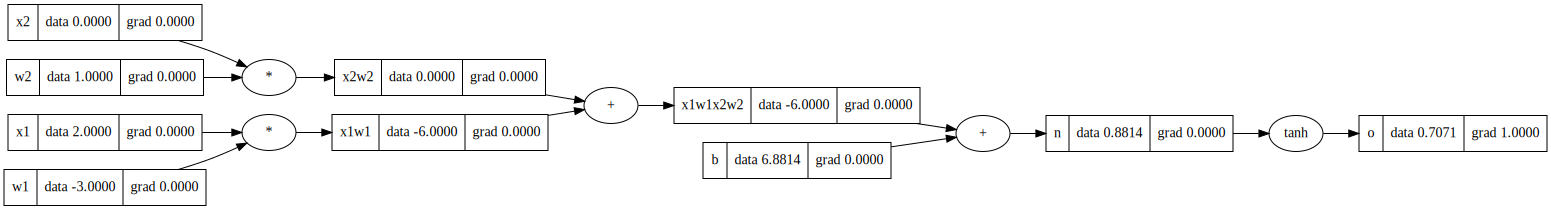

In [81]:
o.grad = 1.0
draw_dot(o)

### 2️⃣ Backprop Step - 2

Same like `+` and `*` done above, we will need to **fine the local derivative for `tanh`**.

That is:
> What is derivative of `o` with respect to the `n` when there is the tanh applied?

Derivative `o` / Derivative `n` = 1 - o ** 2

In [82]:
%xmode Minimal

Exception reporting mode: Minimal


```python
#Will give error 
1 - o**2
```

Oops! We don't have the `__pow__` implemented! <br>
But for now, we will go with the `o.data`.

In [84]:
1 - o.data ** 2

0.5000025364090595

Yes, we have the local derivative of `tanh` 0.5.

In [85]:
n.grad = 0.5

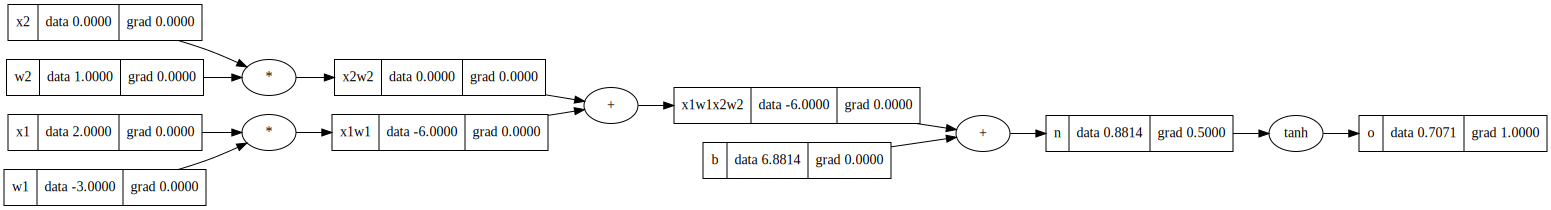

In [86]:
draw_dot(o)

### 3️⃣ Backprop Step - 3
Now we have the `+` sign.

In [87]:
x1w1x2w2.grad = n.grad
b.grad = n.grad

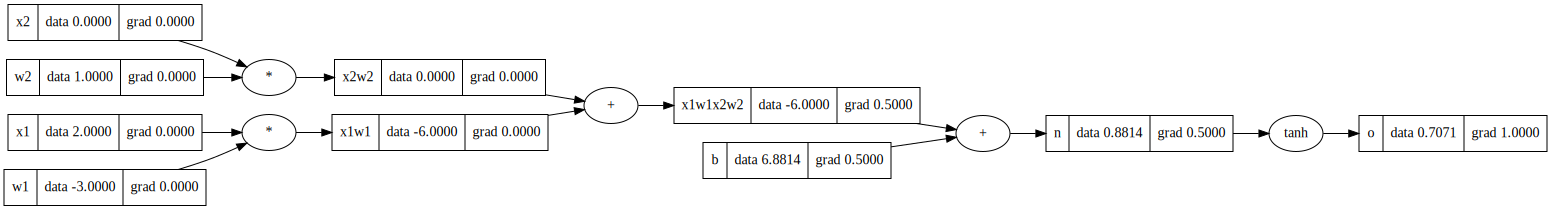

In [88]:
draw_dot(o)

### 4️⃣ Backprop Step - 4
Again, we have the `+` sign.

In [89]:
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad

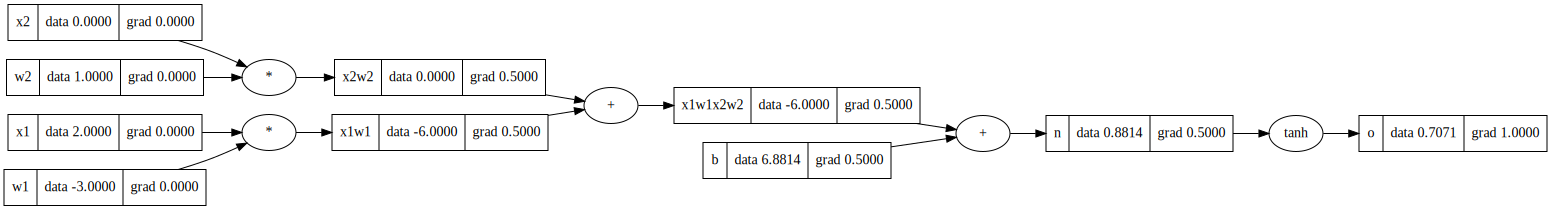

In [90]:
draw_dot(o)

### 5️⃣ Backprop Step - 5
This one will be the cool step. Here we have the `*` sign.

In [91]:
w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad

In [92]:
w2.grad = x2.data * x2w2.grad
x2.grad = w2.data * x2w2.grad

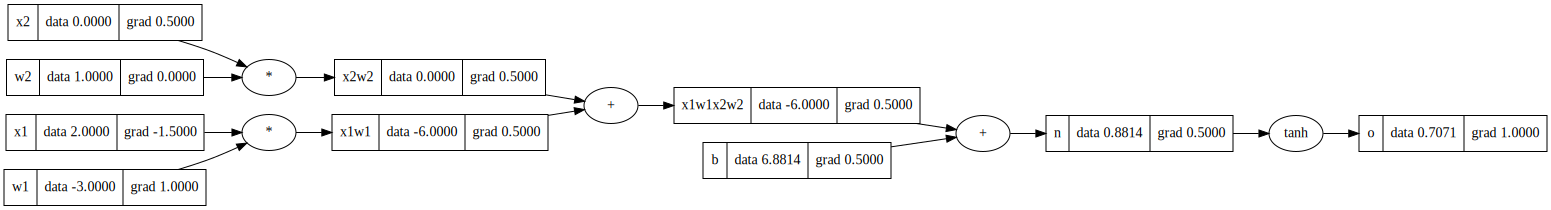

In [93]:
draw_dot(o)

Some interpretation:
- Now, we have some weights here. And in the NN setting we don't care much about the "grads" of the data (here X1 and X2) but the grads of the weights.
- Here, the W1 has the grad `1.0` which means any increase in that weight will propotionaly increase the output
- While the W2 has the grad `0.0` this means it doesn't for the output.

Remember the chain rule. All the grads don't directly affect the outputs but their immediate next layer. *(Here layer is loosely used term. We are just talking about the perceptron here.)*

### We are done!
Again! We have done the basic back prop for our NN! But as it is an intense process - we won't do this manually. We will add the methods in the Value class so that all work can be done automatically.

For that:
- Need to track what kind of operation is being done. 
- In the case of `+` or `-` we will just multiply the previous grad with 1. Or say just assign that to the current node.
- In the case of `*` or `/` we will have to do something else as we know.

So, we need to keep track of what operation is being done. Let's see the Value object now.

In [94]:
class Value:
    """
    Adding the backward functions. Please read the explanation **after**
    this class definition for in-depth understanding.
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
        # because we assume that the value doesn't affect the 
        # loss function by default, thus the slope is 0.0
        self.grad = 0.0 
        
        # This will store a function which will calculate the 
        # local derivative according to the operation and store
        # in the `self.grad` variable.
        self._backward = lambda : None
        
    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        
        def _backward():
            self.grad = (1 - t ** 2) * out.grad # chain rule here too!
        out._backward = _backward
        return out
    
    def relu(self):
        x = self.data
        out = Value(0 if x < 0 else x, (self,), 'ReLU')
        return out

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward(): # for adding
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
    
    
    def __truediv__(self, other):
        out =  Value(self.data / other.data, (self, other), '/')
        def _backward(): # for division
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward(): # for multiplication
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        def _backward(): # for subtraction
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
        
    def __repr__(self):
        return f"Value(data={self.data})"

## 📖 Explanation of the `backward` method in Value.

<pre>
┌──────┐
│      │
│ Value│
│(self)├──────┐        ┌──────┐
└──────┘      ├──┐     │      │
              │ +├─────┤Value │
┌──────┐      ├──┘     │(out) │
│      ├──────┘        └──────┘
│ Value│
│(other)
└───────
</pre>

- Remember that "each" Value object will always be bound with some operation **which won't ever change**.
- Such as say Value object "A" is bound with Value object "B" with "+", then they both always be in that `__add__` state.

And that's where we can leverage the use of ***lexical clousures***. It is the functionality in Python in which ***remembers*** the state of the function even if the function isn't in use. And that advantage comes from Python's *ability to store* the functions as any other variables.

___

Here, what happens is we define the:
```python
class Value:
    def __init__(self, ...):
    ...
    self._backward = lambda : None
    ...
```
Which means it expects some function to be populated later, but at the time of the object creation, we don't know which function will be populated or used. *(because of course that will be decided based upon what operation we do, that we don't know at the time of Value object creation!)*

### Step - 1: Creation of Value object
**Result**: Did nothing with the backward. Because nothing is done with the Value.

<pre>
+--------------+                                      
|   Value      |                                      
|   (self)     |                                      
|              |
|   backward:  |
|   None       |
+--------------+
                      
                      
                      
                      
+--------------+
|    Value     |
|    (other)   |
|              |                                    
|    backward: |                                      
|    None      |                                      
+--------------+                                      
                    
<pre>

### Step - 2: "Add" operation
**Result**: Calls the `__add__` method which stores the `_backward` in the `_out` object.

<pre>
+--------------+                                      
|   Value      |                                      
|   (self)     |                                      
|              |-\                                    
|   backward:  |  --\                                 
|   None       |     -\                               
+--------------+       --\            +--------------+
                       +-------+      |  Value       |
                       |       |      |  (out)       |
                       |   +  ---------              |
                       |       |      |  backward:   |
+--------------+       +-------+      |  add's func  |
|    Value     |      ---/            +--------------+
|    (other)   |  ---/                                
|              |-/                                    
|    backward: |                                      
|    None      |                                      
+--------------+                                      
                    
</pre>



Here, the `_backward` of the `out` or the new Value object after the addition operation will be populated from the `__add__` method. 

It will contain:
```python
out = Value(self.data + other.data, (self, other), '+')
def _backward(): # for adding
    self.grad = 1.0 * out.grad
    other.grad = 1.0 * out.grad
out._backward = _backward
return out
```

So in this step the `_backward` will store:
- self.grad = 0.0
- other.grad = 0.0
Because out.grad has such 0.0 values by default and when the `_backward` will be called with new grad values, the self and other grad values will keep changing accordingly - why? Because of the lexical closure! The `out` remembers the pointers to the `self.grad` and `other.grad`!

We will see how that will be done.

### Testing the `_backward`s!

In [95]:
# We will just have 2 inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# Weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias
b = Value(6.7, label="b")

In [96]:
x1w1 = x1*w1
x1w1._label="x1w1"

x2w2 = x2*w2;
x2w2._label="x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2._label = "x1w1x2w2"

# bias - a special value from the video
b = Value(6.88137, label="b")

# Finally the bias
n = x1w1x2w2 + b
n._label = "n"

# calling tanh
o = n.tanh()
o._label = "o"

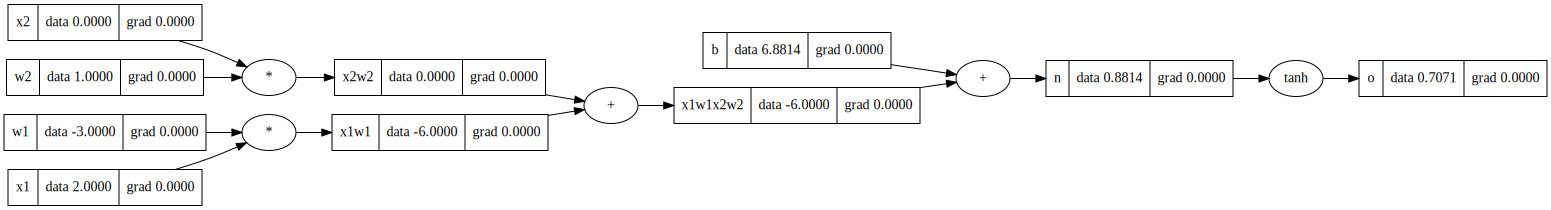

In [97]:
# Make sure every grad is 0.0
draw_dot(o)

Now call the `_backward` from the last node.

In [98]:
o._backward

<function __main__.Value.tanh.<locals>._backward()>

See? It is the `tanh`'s local `_backward`.

**RUN?**

No! We first need to calculate the grad of `o` manually, which will be `1.0` right?

In [99]:
# It is the Backprop step - 1
o.grad = 1.0

In [100]:
# Now, RUN!

# It is the Backprop step - 2
o._backward()

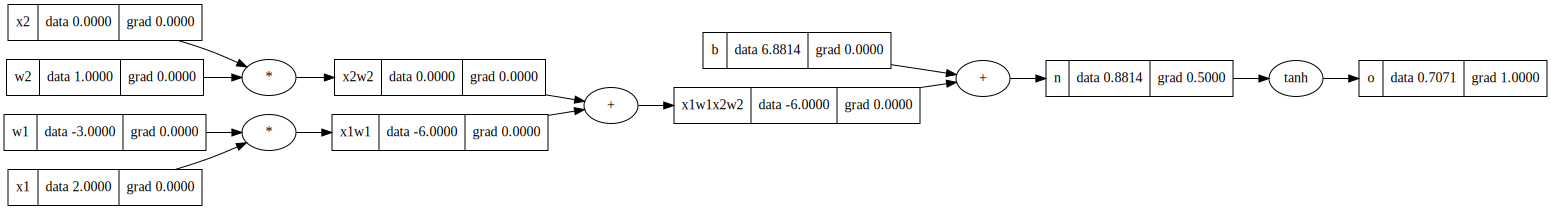

In [101]:
draw_dot(o)

In [102]:
# It is the Backprop step - 3
n._backward()

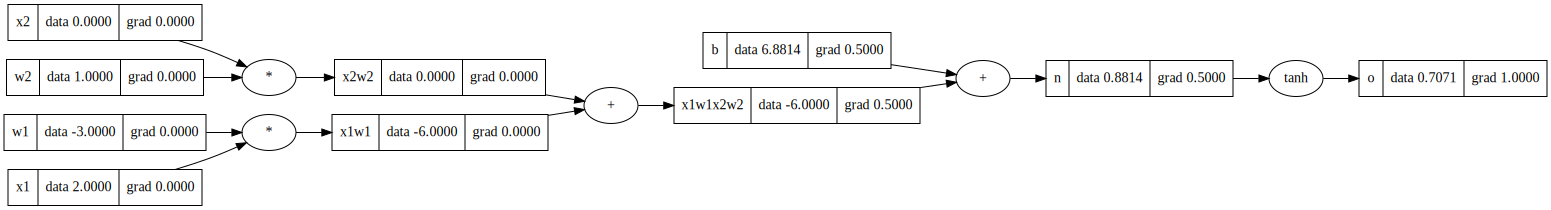

In [103]:
draw_dot(o)

We are getting it!! 

> **Q**: What if I call some other node before the sequence lets it? <br> <br> **A**: Well, it will take the `0` as the grad! But no error! We may put some flag to raise the error, but we won't because it will be called in another function, and not manually.

Now is the `b` and `x1w1x2w2` but... can we call the _backward on `b`? Yes! But that will be `None`!

In [104]:
b._backward

<function __main__.Value.__init__.<locals>.<lambda>()>

In [105]:
# Returns `None`
b._backward()

So, we will call the other one!

In [106]:
# It is the Backprop step - 3
x1w1x2w2._backward()

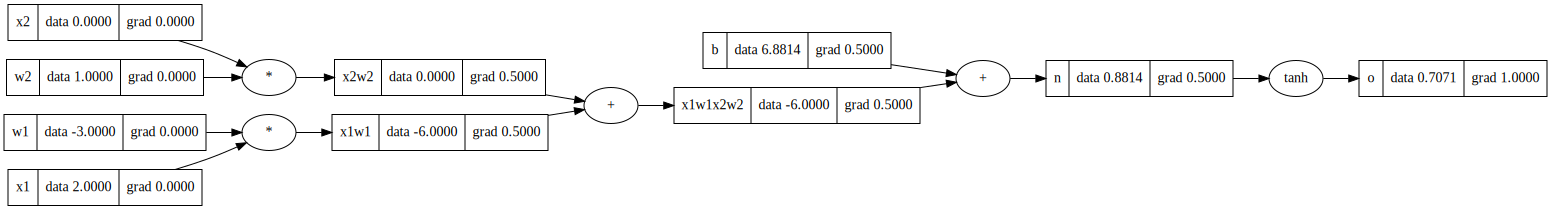

In [107]:
draw_dot(o)

In [108]:
# It is the Backprop step - 4
x1w1._backward()
x2w2._backward()

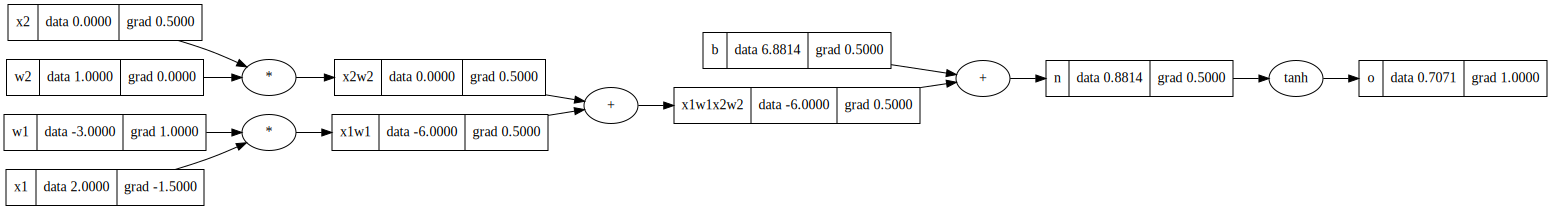

In [109]:
draw_dot(o)

### Done!!!
This way we could finally match with the manual result! 

But still calling the `_backward()` from each node is manual, let's make it done through the function - automate it. For that we need to keep some sequence.

## 🔝 Topological sort

In [110]:
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)

In [111]:
build_topo(o)

In [112]:
topo

[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.88137),
 Value(data=0.8813700000000004),
 Value(data=0.7071049876722272)]

This list starts with the `X1`, `W1`, `X2`, `W2` and all the way through `o` at the last. So, simply we will need to "reverse" traverse the list.

### 👓 Intuition of the topological sort

- We have a list `topo = []` which will store the final list.
- Then we have the visited nodes set `visited = set()` telling use whether to take this path again or not.
- Then we use the recurssion which stops when all nodes are visited (if condition becomes false)

Line-by-line explanation of topological sort.

```python
# The function takes the `Value` object `v` as the parameter
def build_topo(v):
    
    # Check if that `Value` is in the visited set?
    # First time it will be False because the set() is empty (not makes it True so go inside)
    if v not in visited:
        
        # Since it is not visited, we will add it in visited set
        visited.add(v)
        
        # Keep adding the children of this Value
        for child in v._prev:
            # Recurssion, send the child and keep adding their child to the global set
            build_topo(child)
        
        # Finally after the condition is false, come out of the for loop
        # Add "this" value object... this will be repeated for all function calls
        topo.append(v)
```

Recurssion always amazes me 😍

In [113]:
class Value:
    """
    Implementing the "actual" backward method which calls all _backward methods,
    all automatically by applying topological sort.
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
        # because we assume that the value doesn't affect the 
        # loss function by default, thus the slope is 0.0
        self.grad = 0.0 
        
        # This will store a function which will calculate the 
        # local derivative according to the operation and store
        # in the `self.grad` variable.
        self._backward = lambda : None
        
    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        
        def _backward():
            self.grad = (1 - t ** 2) * out.grad # chain rule here too!
        out._backward = _backward
        return out
    
    def relu(self):
        x = self.data
        out = Value(0 if x < 0 else x, (self,), 'ReLU')
        return out
    
    # The main backward method
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

            
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
    
    
    def __truediv__(self, other):
        out =  Value(self.data / other.data, (self, other), '/')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
        
    def __repr__(self):
        return f"Value(data={self.data})"

#### Starting fresh!

In [114]:
# We will just have 2 inputs
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# Weights
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias
b = Value(6.7, label="b")

In [115]:
x1w1 = x1*w1
x1w1._label="x1w1"

x2w2 = x2*w2;
x2w2._label="x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2._label = "x1w1x2w2"

# bias - a special value from the video
b = Value(6.88137, label="b")

# Finally the bias
n = x1w1x2w2 + b
n._label = "n"

# calling tanh
o = n.tanh()
o._label = "o"

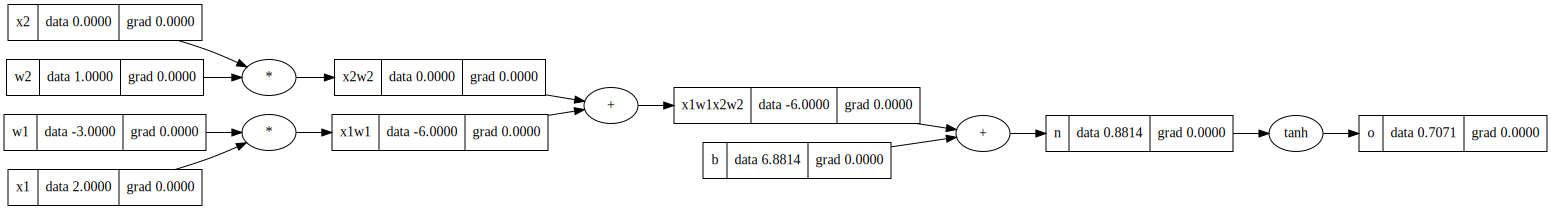

In [116]:
# Make sure every grad is 0.0
draw_dot(o)

All clear!?

In [117]:
# BOOM BOOM 💥
o.backward()

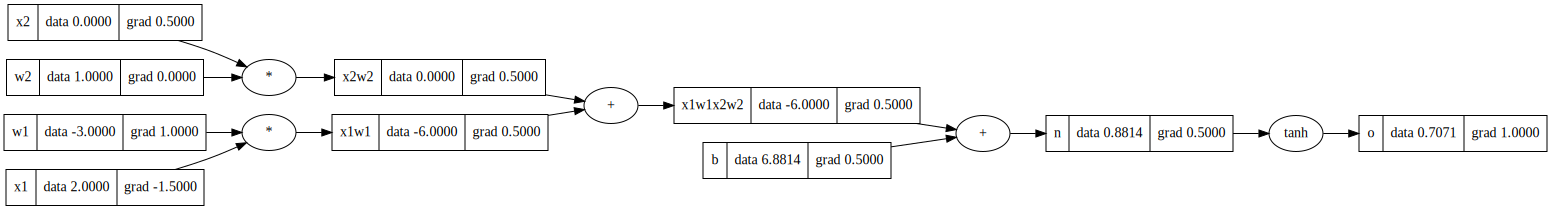

In [118]:
draw_dot(o)

## WOOO!
Done through a single call! *Just for a neuron :)*

# 🐞 Bug - 001

We have some problem here, of double assignment. <br>
Take the following example.

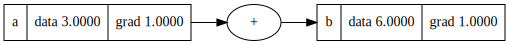

In [119]:
a = Value(3.0, label='a')
b = a + a
b._label = 'b'

b.backward()
draw_dot(b)

Is it right? 

Oh yeah! We did `a + a` which results `6.0` and the value for `b` is `6.0` so, it is right... and also the grad for `b` is `1.0` *(by default)* then is the `+` sign so `a` should also have the `1.0` so that's correct.

***Nah. The second sentence isn't correct.***
___

See, **a unit increase in `a` won't lead to the a unit increase in `b`** because now **a unit increase in `a` will lead to double increase in `b`** so the grad of `a` should have been `2.0` instead of `1.0`.

### Some math!?

1. $\text{slope} = (\text{new} - \text{old}) / h$
2. $= ((a + h) + (a + h) - a+a) / h$
3. $= (2(a + h) - 2a) / h$
4. $= (2a + 2h - 2a) / h$
5. $= 2h / h$
6. $= 2$

👉 One more example

In [120]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')

d = a * b;
d._label = 'd'

e = a + b
e._label = 'e'

f = d * e
f._label = 'f'

In [121]:
f.backward()

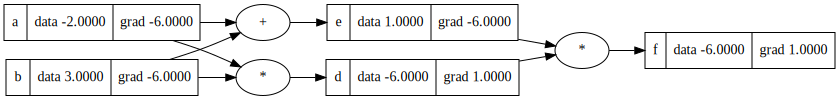

In [122]:
draw_dot(f)

Here the problem is... 
- We have `a` and `b` associated with `*` and `+` both! 
- So... first say the gradients for `a` and `b` are calculated for `+` but after that they are calculated for `*`
- Which leads to the overwriting the gradients.

Here we can easily see that `a` has grad `3.0` which is the result of `*` multiplication.

### Oopsie?

**Solution**: Just fix it by `=` into `+=`.

In [123]:
class Value:
    """
    Updating the gradient sign from "=" to "+=" for the gradient accumulation.
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
        # because we assume that the value doesn't affect the 
        # loss function by default, thus the slope is 0.0
        self.grad = 0.0 
        
        # This will store a function which will calculate the 
        # local derivative according to the operation and store
        # in the `self.grad` variable.
        self._backward = lambda : None
        
    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        
        def _backward():
            self.grad += (1 - t ** 2) * out.grad # chain rule here too!
        out._backward = _backward
        return out
    
    def relu(self):
        x = self.data
        out = Value(0 if x < 0 else x, (self,), 'ReLU')
        return out
    
    
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

            
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    
    def __truediv__(self, other):
        out =  Value(self.data / other.data, (self, other), '/')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
        
    def __repr__(self):
        return f"Value(data={self.data})"

### Check.

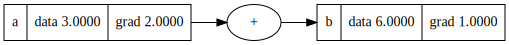

In [124]:
a = Value(3.0, label='a')
b = a + a
b._label = 'b'

b.backward()
draw_dot(b)

✅ Done.

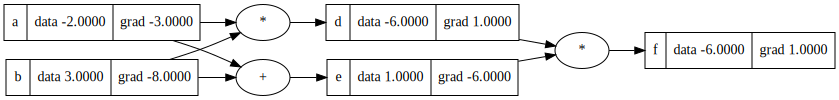

In [125]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')

d = a * b;
d._label = 'd'

e = a + b
e._label = 'e'

f = d * e
f._label = 'f'

f.backward()

draw_dot(f)

✅ Done.

In [126]:
class Value:
    """
    A small addition in feature.
    >>> # Can't do this
    >>> Value(1) + 1 -> :Error:
    
    So we will need to wrap the `1` as the `Value` object.
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
        # because we assume that the value doesn't affect the 
        # loss function by default, thus the slope is 0.0
        self.grad = 0.0 
        
        # This will store a function which will calculate the 
        # local derivative according to the operation and store
        # in the `self.grad` variable.
        self._backward = lambda : None
        
    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        
        def _backward():
            self.grad += (1 - t ** 2) * out.grad # chain rule here too!
        out._backward = _backward
        return out
    
    def relu(self):
        x = self.data
        out = Value(0 if x < 0 else x, (self,), 'ReLU')
        return out
    
    
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

            
    def __add__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    
    def __truediv__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out =  Value(self.data / other.data, (self, other), '/')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __mul__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __sub__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out = Value(self.data - other.data, (self, other), '-')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
        
    def __repr__(self):
        return f"Value(data={self.data})"

In [127]:
# Works.
Value(1) + 1

Value(data=2)

In [128]:
# Doesn't
1 + Value(1)

TypeError: unsupported operand type(s) for +: 'int' and 'Value'

Need to implement a couple of more methods.

In [129]:
class Value:
    """
    A small addition in feature.
    >>> # Can't do this
    >>> Value(1) + 1 -> :Error:
    
    So we will need to wrap the `1` as the `Value` object.
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
        # because we assume that the value doesn't affect the 
        # loss function by default, thus the slope is 0.0
        self.grad = 0.0 
        
        # This will store a function which will calculate the 
        # local derivative according to the operation and store
        # in the `self.grad` variable.
        self._backward = lambda : None
        
    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        
        def _backward():
            self.grad += (1 - t ** 2) * out.grad # chain rule here too!
        out._backward = _backward
        return out
    
    def relu(self):
        x = self.data
        out = Value(0 if x < 0 else x, (self,), 'ReLU')
        return out
    
    
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

            
    def __add__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    
    def __truediv__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out =  Value(self.data / other.data, (self, other), '/')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __mul__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __sub__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out = Value(self.data - other.data, (self, other), '-')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self + other
    
    def __rmul__(self, other):
        return self * other
    
    def __rsub__(self, other):
        return self - other
    
    def __rtruediv__(self, other):
        return self / other
    
    def __repr__(self):
        return f"Value(data={self.data})"

In [130]:
1 + Value(1)

Value(data=2)

Adding some more dunders!

In [131]:
class Value:
    """
    Added `exp` and `pow`
    """
    
    def __init__(self, data, _children=(), operation="", label=""):
        self.data = data
        self._prev = set(_children)
        self._operation = operation
        self._label = label
        
        # because we assume that the value doesn't affect the 
        # loss function by default, thus the slope is 0.0
        self.grad = 0.0 
        
        # This will store a function which will calculate the 
        # local derivative according to the operation and store
        # in the `self.grad` variable.
        self._backward = lambda : None
        
    def tanh(self):
        x = self.data
        t = (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")
        
        def _backward():
            self.grad += (1 - t ** 2) * out.grad # chain rule here too!
        out._backward = _backward
        return out
    
    def relu(self):
        x = self.data
        out = Value(0 if x < 0 else x, (self,), 'ReLU')
        return out
    
    
    def backward(self):
        topo = []
        visited = set()

        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

            
    def __add__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    
    def __truediv__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out =  Value(self.data / other.data, (self, other), '/')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __mul__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    
    
    def __sub__(self, other):
        other = Value(other) if not isinstance(other, Value) else other
        out = Value(self.data - other.data, (self, other), '-')
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __radd__(self, other):
        return self + other
    
    def __rmul__(self, other):
        return self * other
    
    def __rsub__(self, other):
        return self - other
    
    def __rtruediv__(self, other):
        return self / other
    
    def exp(self):
        x = self.data
        out = Value(np.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad # chain rule
        out._backward = _backward
        return out
        
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "Only int/float can be used"
        out = Value(self.data ** other, (self, ), f'**{other}')
        
        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad # chain rule
        out._backward = _backward
        return out
    
    def __repr__(self):
        return f"Value(data={self.data})"

In [132]:
a = Value(2.0)
b = Value(4.0)
a ** b.data

Value(data=16.0)

# Neurons!

In [133]:
class Neuron:
    """
    Takes nin = Number of inputs.
    So if you pass 3 it will create W1, W2, W3 with random weights.
    """
    def __init__(self, nin):
        self.w = [Value(np.random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(np.random.uniform(-1, 1))
        
    def __call__(self, x):
        pass

The calling signature will be:

```python
data = [2.0, 3.0]
n = Neuron(nin=2) # because data is of len 2
n(data) # or n.__call__(data)
```

> Note: The `__call__` will perform the "forward pass".

In [134]:
class Neuron:
    """
    Making the __call__ proper which multiplies X1 with W1 and Xn with Wn.
    """
    def __init__(self, nin):
        self.w = [Value(np.random.uniform(-1, 1), label=f'w{i}') for i in range(nin)]
        self.b = Value(np.random.uniform(-1, 1), label='b')
        
    def __call__(self, x):
        out = sum(xi*wi for xi, wi in zip(x, self.w)) + self.b
        activated = out.tanh()
        return activated
            

In [135]:
data = [2.0, 3.0]
n = Neuron(2)
result = n(data)
result

Value(data=-0.9984946942095348)

Which is simply...

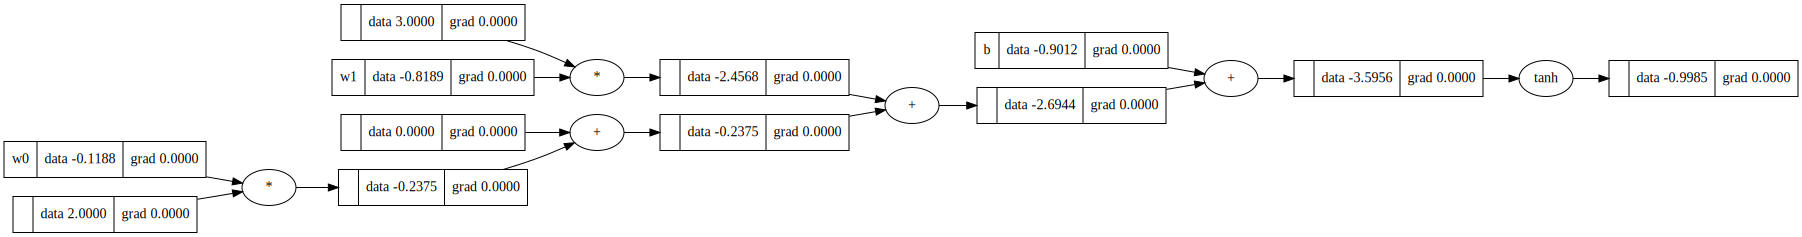

In [136]:
draw_dot(result)

The expression ***might*** confuse you... but it is the same. First it does the multiplication and then the summation of all together... but step-by-step.

In [137]:
# A, bigger, scarier version
data = [1., 2., 3., 4., 5.]
n = Neuron(5)
result = n(data)
result

Value(data=0.9969817771817439)

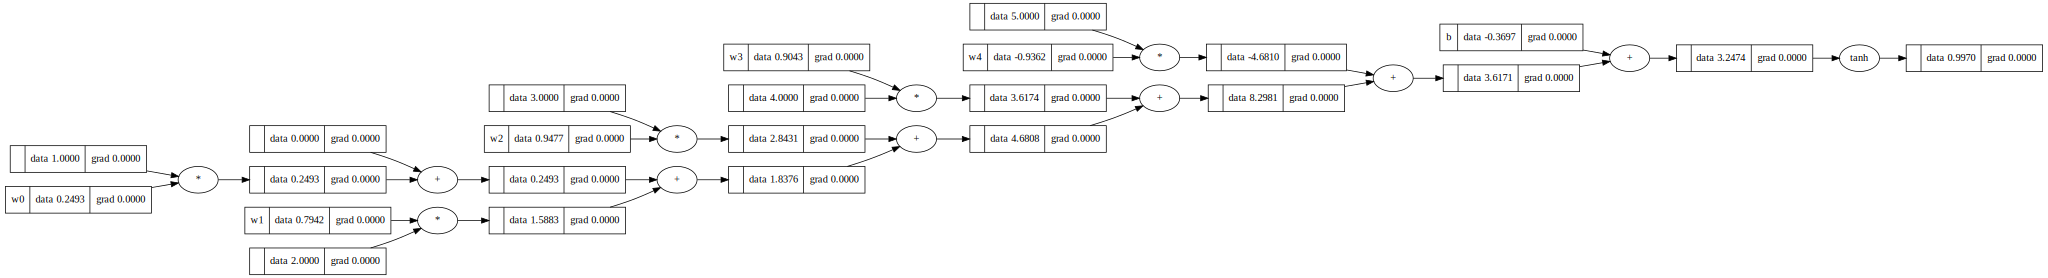

In [138]:
draw_dot(result)

Also a back prop!

In [139]:
result.backward()

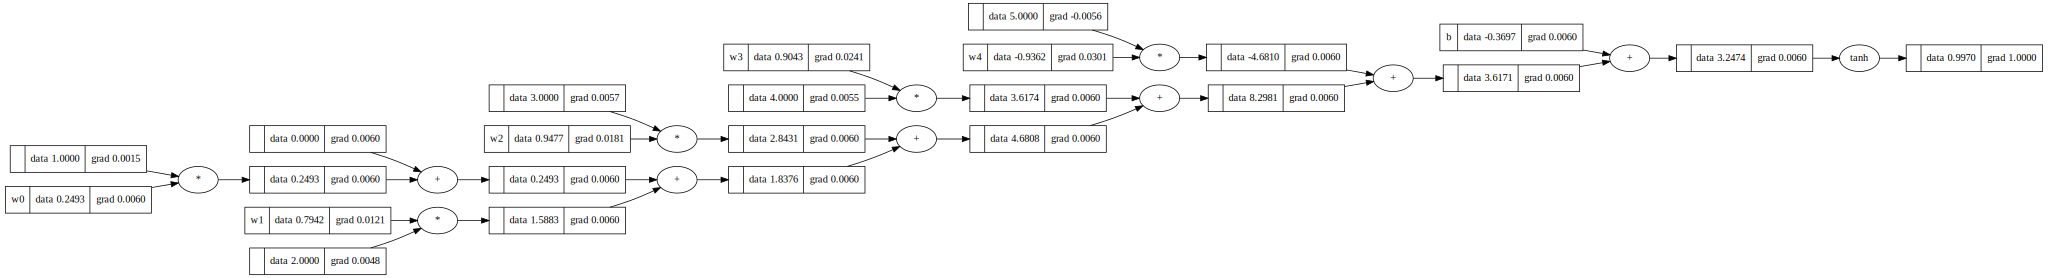

In [140]:
draw_dot(result)

### Dude!

Till now, we have made a class which creates the "single expression" or the Neuron with which we have been playing till now. So, everything we have done till now... is in the neuron.

### Now, we will create a layer.

So, the hierarchy will be...

- Values: The atoms
- Neuron: The collection of Values
- Layer: The collection of Neurons

🌋

In [141]:
class Layer:
    """
    It takes number of inputs (so to know how many inputs a single neuron will take)
    and number of outputs (so to know how many neurons to make - as single neuron will
    output a single number).
    """
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        activateds = [n(x) for n in self.neurons]
        return activateds[0] if len(activateds) == 1 else activateds

In [142]:
data = [2.0, 3.0]
layer = Layer(nin=2, nout=3)

In [143]:
layer(data)

[Value(data=0.7343660091194875),
 Value(data=0.9511277088606891),
 Value(data=-0.9995770199338468)]

Alrighty! Some visualization?

<pre>
          +----------+         
          |          |         
         --/Neuron:1 |         
       -/ /          |         
+---+-/  /+----------+         
|x1-|   /                      
+---+\-/                       
     |/\- +----------+         
+---+/\  \-          |         
|x2 |---  |\Neuron:2 |         
+---+\ |\---         |         
      \ \ +----------+         
       \|                      
        \\                     
        | \----------+         
         \|          |         
          \\Neuron:3 |         
          |\         |         
          +----------+  
</pre>

Oops, I think we should stop visualizing like that!

Now the MODEL! (**MLP** - Multi layer perceptron)

In [144]:
from typing import List

In [145]:
class MLP:
    """
    This will create multiple layers.
    All conntected densly to each other.
    
    nin: The shape of the data that comes
    nouts: Note the "s" there. Here is the list of nout. 
            Which defines the "sizes" of all layers in the MLP.
            (which of course contains the length from which we
            will be able to make `n` layers 😉)
    """
    
    def __init__(self, nin: int, nouts: List):
        sizes = [nin] + nouts
        self.layers = []
        
        for i in range(len(nouts)):
            layer = Layer(sizes[i], sizes[i + 1])
            self.layers.append(layer)
    
    def __call__(self, x):
        for layer in self.layers: 
            x = layer(x) # WOW! The output becomes the input of the next layer.
        return x

In [146]:
%xmode Plain

Exception reporting mode: Plain


In [147]:
data = [2.0, 3.0, 0.22, -0.3]

# We will have total 3 layers and 4 inputs
# Layer-1: 4 inputs | 4 outputs
# Layer-2: 4 inputs | 2 outputs
# Layer-3: 2 inputs | 1 output
model = MLP(nin=3, nouts=[4, 2, 1])

In [148]:
result = model(data)
result

Value(data=0.21630506501622915)

Oh my! 

<img src="./Images/MLP.jpg">

# 🤕 Let's wrap our head around

<img src="./Images/Explanation.jpg">

### I hope... that's clear.

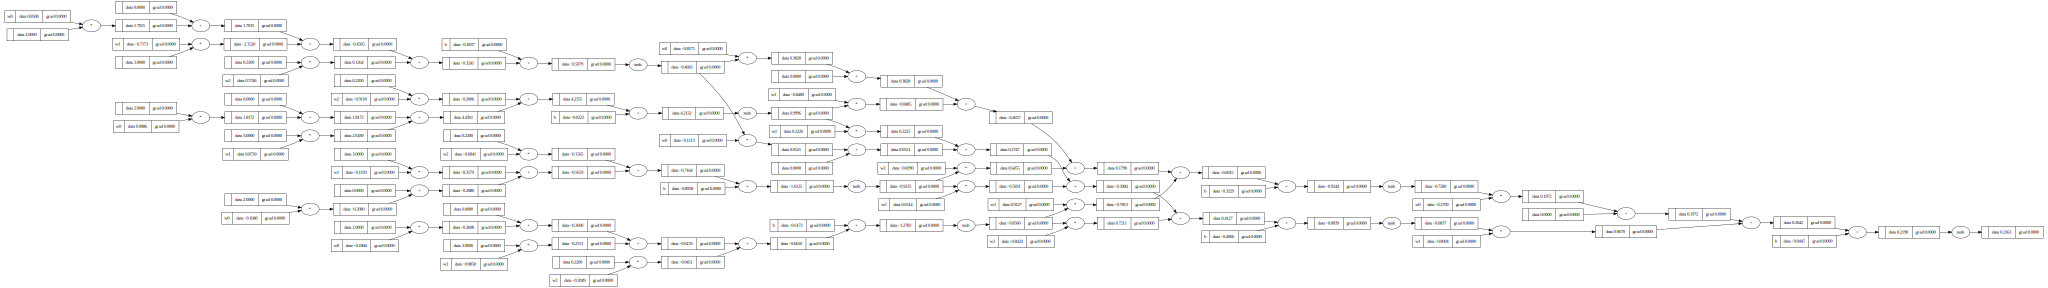

In [150]:
draw_dot(result)

# I am enjoying, do you?

# 🍥 Example training

In [151]:
data = [
    [2.0, 2.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

target = [1.0, -1.0, -1.0, 1.0] # true outputs - a binary classifier

In [152]:
model = MLP(nin=3, nouts=[4, 2, 1]) # same structure

In [153]:
model(data[0])

Value(data=0.4904005989808022)

In [154]:
# So for all examples
preds = [model(x) for x in data]
preds

[Value(data=0.4904005989808022),
 Value(data=0.48928572735184356),
 Value(data=0.7183784351908206),
 Value(data=0.5393579551761688)]

Alright! Since this is the static - non trained NN it has to give some weird response already. 

# 🔧 Loss function? To tune it?

In [155]:
loss = [(ytrue - ypred)**2 for ytrue, ypred in zip(target, preds)]
loss

[Value(data=0.25969154951912515),
 Value(data=2.2179719776939097),
 Value(data=2.9528244465288536),
 Value(data=0.2121910934594805)]

In [156]:
# The final loss based on which we will tune the model
loss = sum(loss)
loss

Value(data=5.642679067201369)

In [157]:
# THE MAGIC 🎩✨🌟
loss.backward()

Now, we have got ourselves the gradients! (After these 4 examples and the loss - thus it is the concept of batch 😉)

In [158]:
model.layers[0].neurons[0].w

[Value(data=0.1907181304893213),
 Value(data=0.0965741522441188),
 Value(data=0.10082249523022946)]

In [159]:
model.layers[0].neurons[0].w[0].grad

-0.8864524454946314

Is it too much? Now dude! You, the reader now have implemented the NN from scratch!

# The peak of craziness.

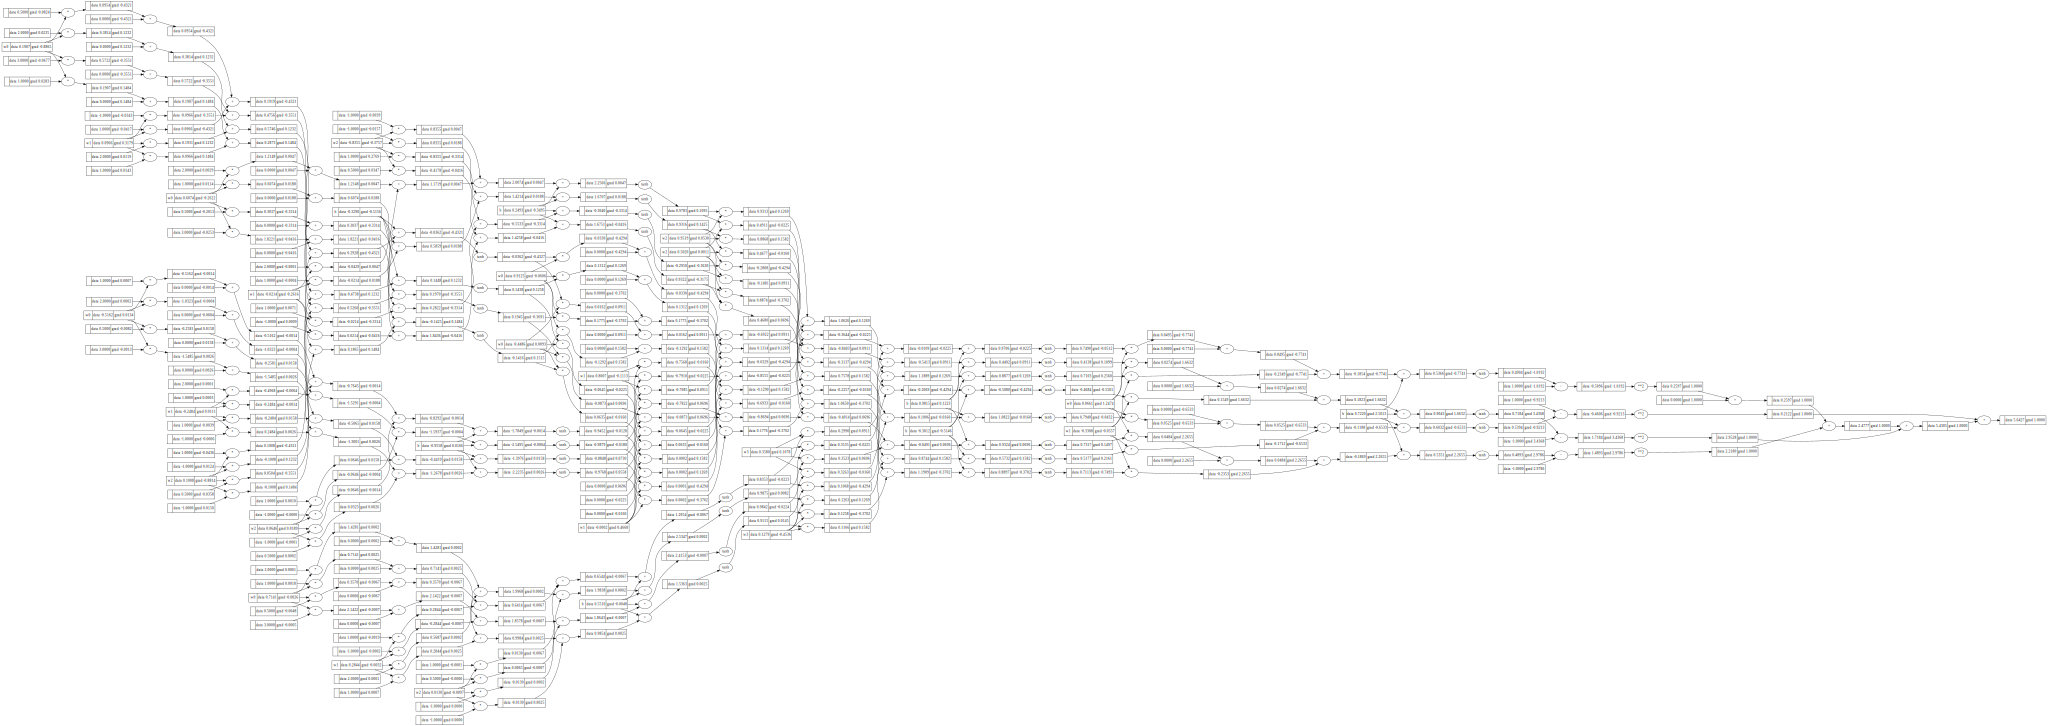

In [160]:
draw_dot(loss)

## But to "tune" it...
We will need to update the values of weights by using their gradients. **We can update the data values using their grads** because we have them... but we won't because the data is **given** and can't be changed, but the weights can. So, just a slight change in the code...

In [161]:
class Neuron:
    """
    Making a new function `parameters` which will return ONLY the weights + bias.
    """
    def __init__(self, nin):
        self.w = [Value(np.random.uniform(-1, 1), label=f'w{i}') for i in range(nin)]
        self.b = Value(np.random.uniform(-1, 1), label='b')
        
    def __call__(self, x):
        out = sum(xi*wi for xi, wi in zip(x, self.w)) + self.b
        activated = out.tanh()
        return activated
        
    def parameters(self):
        return self.w + [self.b]

In [162]:
class Layer:
    """
    Added a new function `parameters` which will fetch all parames from all neurons
    and then make a flat list of all params
    """
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        activateds = [n(x) for n in self.neurons]
        return activateds[0] if len(activateds) == 1 else activateds
    
    def parameters(self):
        params = [] # the flat list of params
        for neuron in self.neurons:
            ps = neuron.parameters()
            params.extend(ps)
        return params

In [163]:
class MLP:
    """
    Added a new function `parameters` to get the parameters from all layers and 
    then flatten it.
    """
    
    def __init__(self, nin: int, nouts: List):
        sizes = [nin] + nouts
        self.layers = []
        
        for i in range(len(nouts)):
            layer = Layer(sizes[i], sizes[i + 1])
            self.layers.append(layer)
    
    def __call__(self, x):
        for layer in self.layers: 
            x = layer(x)
        return x
    
    def parameters(self):
        params = [] # the flat list of params
        for layer in self.layers:
            ps = layer.parameters()
            params.extend(ps)
        return params 

# Tuning. A real tuning.

In [164]:
data = [
    [2.0, 2.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

target = [1.0, -1.0, -1.0, 1.0] # true outputs - a binary classifier

In [202]:
model = MLP(nin=3, nouts=[4, 2, 1]) # same structure

In [203]:
model.parameters()

[Value(data=0.8213755499266324),
 Value(data=0.6358876102508868),
 Value(data=-0.37835747459569213),
 Value(data=0.34478557971657686),
 Value(data=0.8994536576394099),
 Value(data=0.5580550313851906),
 Value(data=0.6310049411319849),
 Value(data=-0.7629766046156223),
 Value(data=0.4003409161962814),
 Value(data=-0.6883571636138341),
 Value(data=0.15470434692574764),
 Value(data=0.3587844710476986),
 Value(data=0.2780795004842014),
 Value(data=-0.953914915985782),
 Value(data=-0.6569488167514537),
 Value(data=-0.2834036052024438),
 Value(data=0.2996597525381588),
 Value(data=-0.947987796698817),
 Value(data=-0.4318112389796436),
 Value(data=0.6663747923850829),
 Value(data=-0.38074539988334744),
 Value(data=0.801018517034739),
 Value(data=0.9965878681760652),
 Value(data=0.4836246907275399),
 Value(data=0.2339621406432757),
 Value(data=-0.02299866844209597),
 Value(data=-0.3345944866821795),
 Value(data=-0.30334048641271316),
 Value(data=0.562436412860319)]

The params from all layers, neurons and their biases.

In [204]:
# So for all examples
preds = [model(x) for x in data]
preds

[Value(data=0.5269707514881704),
 Value(data=0.45898192960755946),
 Value(data=0.5521151326968528),
 Value(data=0.4436696960594869)]

In [205]:
loss = [(ytrue - ypred)**2 for ytrue, ypred in zip(target, preds)]
loss

[Value(data=0.22375666994766624),
 Value(data=2.1286282709213977),
 Value(data=2.4090613851465688),
 Value(data=0.30950340708254365)]

In [206]:
# The final loss based on which we will tune the model
loss = sum(loss)
loss

Value(data=5.0709497330981765)

In [207]:
loss.backward()

Check the data of **this** particular weight

In [208]:
model.layers[0].neurons[0].w[0].data

0.8213755499266324

Check the grad of **this** particular weight

In [209]:
model.layers[0].neurons[0].w[0].grad

-0.06797899315217368

The tuning...

In [210]:
learning_rate = 0.01

for p in model.parameters():
    # The weight update
    p.data += -learning_rate * p.grad

Now check the data of **this** particular weight

In [211]:
model.layers[0].neurons[0].w[0].data

0.8220553398581542

Now check the grad of **this** particular weight

In [212]:
model.layers[0].neurons[0].w[0].grad

-0.06797899315217368

Note the change!?

In [213]:
# Recalculate the loss
preds = [model(x) for x in data]
loss = [(ytrue - ypred)**2 for ytrue, ypred in zip(target, preds)]
loss = sum(loss)
loss

Value(data=4.830020651252569)

Yes! The loss has been decreased!

## Now run this for enough epochs and there we go!

In [214]:
# Training loop
losses = []
for epoch in range(10):
    # Forward pass
    preds = [model(x) for x in data]
    
    # Loss calculation
    loss = [(ytrue - ypred)**2 for ytrue, ypred in zip(target, preds)]
    loss = sum(loss)
    losses.append(loss.data)
    
    # backward pass
    loss.backward()
    
    # update
    learning_rate = 0.05
    for p in model.parameters():
        # The weight update
        p.data += -learning_rate * p.grad

## Lets see the training
How cool that is to see the training of our own!!! 😍

In [215]:
import matplotlib.pyplot as plt

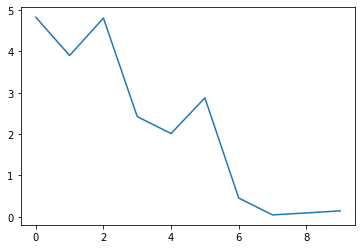

In [216]:
plt.plot(losses)

We could also create a "validation" set and so on on this!!

In [217]:
preds

[Value(data=0.7164071791280526),
 Value(data=-0.9955973720045076),
 Value(data=-0.9989544689696553),
 Value(data=0.7586057187153143)]

Now it is getting closer to the right values!

# 🐞 Bug - 002

This bug is related with the `Bug - 001`. 

If you recall in that bug, we did the `+=` operation so that the gradients can be accumulated. So, now in this training... we are ***still*** doing the same for a lot of times!

Meaning,
1. Backprop-1 we will do one `.backward()`
2. Backprop-2 we will do the same backward call
3., 4., 5. ...

There all the gradients will be `+=`. For that we need to flush the gradients! `zero_grad`. We will make all gradients 0. Or reset them.

In [ ]:
# Training loop
losses = []
for epoch in range(10):
    # Forward pass
    preds = [model(x) for x in data]
    
    # Loss calculation
    loss = [(ytrue - ypred)**2 for ytrue, ypred in zip(target, preds)]
    loss = sum(loss)
    losses.append(loss.data)
    
    ### ZERO GRAD ###
    for p in model.parameters():
        p.grad = 0.0
        
    # backward pass
    loss.backward()
    
    # update
    learning_rate = 0.05
    for p in model.parameters():
        # The weight update
        p.data += -learning_rate * p.grad

# 

# Done!!
That covers all information for the NN!
 
 
Can you believe, you have made the neural nets from SCRATCH!? This was an amazing experience! I loovved it. Hope you will too.

See you again in another notebook ✌